In [1]:
### Data Collection
import pandas_datareader as pdr
#key="60cbcc7406b384b442e972f4ce75433e9742e244"

In [2]:
#df = pdr.get_data_tiingo('MSFT', api_key=key)

In [3]:
#df.to_csv('MSFT.csv')

###Importing Dataset

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('MSFT.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-14,59.020000,59.080002,57.279999,58.119999,53.774288,41328400
1,2016-11-15,58.330002,59.490002,58.320000,58.869999,54.836185,35904100
2,2016-11-16,58.939999,59.660000,58.810001,59.650002,55.562737,27332500
3,2016-11-17,60.410000,60.950001,59.970001,60.639999,56.484898,32132700
4,2016-11-18,60.779999,61.139999,60.299999,60.349998,56.214760,27686300


In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-14,59.020000,59.080002,57.279999,58.119999,53.774288,41328400
1,2016-11-15,58.330002,59.490002,58.320000,58.869999,54.836185,35904100
2,2016-11-16,58.939999,59.660000,58.810001,59.650002,55.562737,27332500
3,2016-11-17,60.410000,60.950001,59.970001,60.639999,56.484898,32132700
4,2016-11-18,60.779999,61.139999,60.299999,60.349998,56.214760,27686300
...,...,...,...,...,...,...,...
1253,2021-11-05,338.510010,338.790009,334.420013,336.059998,336.059998,22564000
1254,2021-11-08,337.299988,337.649994,334.440002,336.989990,336.989990,20897000
1255,2021-11-09,337.109985,338.720001,334.529999,335.950012,335.950012,21307400
1256,2021-11-10,334.570007,334.630005,329.920013,330.799988,330.799988,25500900


In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-14,59.020000,59.080002,57.279999,58.119999,53.774288,41328400
1,2016-11-15,58.330002,59.490002,58.320000,58.869999,54.836185,35904100
2,2016-11-16,58.939999,59.660000,58.810001,59.650002,55.562737,27332500
3,2016-11-17,60.410000,60.950001,59.970001,60.639999,56.484898,32132700
4,2016-11-18,60.779999,61.139999,60.299999,60.349998,56.214760,27686300


In [9]:
df1=df.reset_index()['Close']

In [10]:
df1

0        58.119999
1        58.869999
2        59.650002
3        60.639999
4        60.349998
           ...    
1253    336.059998
1254    336.989990
1255    335.950012
1256    330.799988
1257    332.429993
Name: Close, Length: 1258, dtype: float64

###Plot

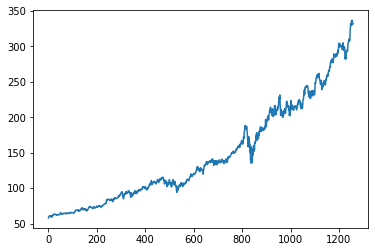

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [13]:
import numpy as np

In [14]:
df1

0        58.119999
1        58.869999
2        59.650002
3        60.639999
4        60.349998
           ...    
1253    336.059998
1254    336.989990
1255    335.950012
1256    330.799988
1257    332.429993
Name: Close, Length: 1258, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.        ]
 [0.00268943]
 [0.00548644]
 ...
 [0.99627074]
 [0.97780327]
 [0.98364831]]


###splitting dataset into train and test split

In [17]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 441)

In [19]:
train_data

array([[0.        ],
       [0.00268943],
       [0.00548644],
       [0.00903647],
       [0.00799655],
       [0.00982537],
       [0.0107577 ],
       [0.00817586],
       [0.00864202],
       [0.0089289 ],
       [0.01065013],
       [0.00767382],
       [0.00387278],
       [0.00405207],
       [0.0075304 ],
       [0.0065622 ],
       [0.01165418],
       [0.01036325],
       [0.01380572],
       [0.01452289],
       [0.01742748],
       [0.01635171],
       [0.01599313],
       [0.01498906],
       [0.01972245],
       [0.01943559],
       [0.01943559],
       [0.01947144],
       [0.01835982],
       [0.01850325],
       [0.01746335],
       [0.01714061],
       [0.01441532],
       [0.01599313],
       [0.01498906],
       [0.01498906],
       [0.01692545],
       [0.01620827],
       [0.01613655],
       [0.01818051],
       [0.0161007 ],
       [0.01642343],
       [0.01581382],
       [0.01570625],
       [0.01498906],
       [0.01656687],
       [0.01735576],
       [0.019

###convert an array of values into a dataset matrix

In [20]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50))
model.add(Dense(1,))

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1),))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1,))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 285ms/step - loss: 0.0112 - val_loss: 0.0885
Epoch 2/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0020 - val_loss: 0.0046
Epoch 3/100
12/12 [==============================] - 2s 175ms/step - loss: 4.1646e-04 - val_loss: 0.0054
Epoch 4/100
12/12 [==============================] - 2s 179ms/step - loss: 2.4233e-04 - val_loss: 0.0030
Epoch 5/100
12/12 [==============================] - 2s 178ms/step - loss: 1.5940e-04 - val_loss: 0.0014
Epoch 6/100
12/12 [==============================] - 2s 176ms/step - loss: 1.5025e-04 - val_loss: 0.0015
Epoch 7/100
12/12 [==============================] - 2s 179ms/step - loss: 1.4048e-04 - val_loss: 0.0017
Epoch 8/100
12/12 [==============================] - 2s 178ms/step - loss: 1.4289e-04 - val_loss: 0.0015
Epoch 9/100
12/12 [==============================] - 2s 179ms/step - loss: 1.3049e-04 - val_loss: 0.0016
Epoch 10/100
12/12 [==============================] - 2s 190ms/

In [31]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [32]:
### The prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

109.34581829084559

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

261.82575287672853

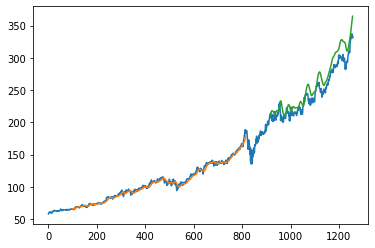

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

441

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.7428192228829671,
 0.7479112480051682,
 0.7419227477939713,
 0.7551906221419141,
 0.7648008099946474,
 0.7630078598166556,
 0.7655180330966483,
 0.7872126872195438,
 0.7872485820821074,
 0.7953885364452858,
 0.7863879982697745,
 0.7882526270099819,
 0.7860293867187739,
 0.7991537963652747,
 0.8046402203240292,
 0.7993330483522699,
 0.7983289998384947,
 0.7849177683661203,
 0.7932011874307409,
 0.8006598135544819,
 0.8176570565457509,
 0.8303152776305717,
 0.8280919297623529,
 0.819091395172742,
 0.8179438783716243,
 0.8189479268853995,
 0.8132463596629874,
 0.8129236393886498,
 0.8211711671766077,
 0.8189838217479629,
 0.8297773065155657,
 0.8295621596660073,
 0.8255100779201446,
 0.8187327800358412,
 0.8205616250763964,
 0.8308172498919041,
 0.8417184156612966,
 0.8479937412842676,
 0.842543104611066,
 0.8341163248361133,
 0.8557750840964456,
 0.8829920534547585,
 0.8840319968310969,
 0.8767526226943508,
 0.8745652772657063,
 0.8640943980236296,
 0.8663535331774009,
 0.880230949625

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.111439]
101
1 day input [0.74791125 0.74192275 0.75519062 0.76480081 0.76300786 0.76551803
 0.78721269 0.78724858 0.79538854 0.786388   0.78825263 0.78602939
 0.7991538  0.80464022 0.79933305 0.798329   0.78491777 0.79320119
 0.80065981 0.81765706 0.83031528 0.82809193 0.8190914  0.81794388
 0.81894793 0.81324636 0.81292364 0.82117117 0.81898382 0.82977731
 0.82956216 0.82551008 0.81873278 0.82056163 0.83081725 0.84171842
 0.84799374 0.8425431  0.83411632 0.85577508 0.88299205 0.884032
 0.87675262 0.87456528 0.8640944  0.86635353 0.88023095 0.87409909
 0.87391973 0.87148135 0.87144556 0.86800302 0.86811059 0.85749636
 0.85197404 0.85656399 0.86660457 0.88464165 0.88607599 0.8668914
 0.84691791 0.84871086 0.86226556 0.86577978 0.86502677 0.84645183
 0.8082619  0.80998318 0.80252455 0.82827129 0.80679167 0.8270521
 0.84265067 0.84889022 0.84889022 0.84666698 0.84182599 0.8541256
 0.87721881 0.88245419 0.89349883 0.89686958 0.89392912 0.90594191
 0.90020444 0.89651097 0.90361098 0.9504

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1258

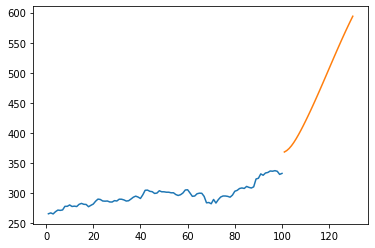

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

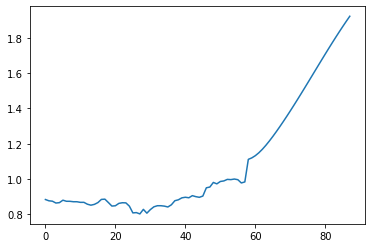

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [47]:
df3=scaler.inverse_transform(df3).tolist()

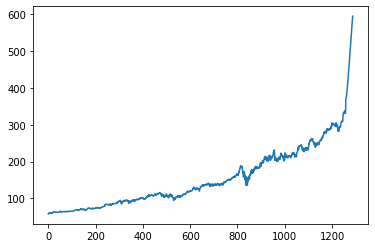

In [48]:
plt.plot(df3)